# Question 6

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
dataset = loadmat('house_data.mat')

# loading the training and testing data and labels
train_data = dataset['Xtrain']
test_data = dataset['Xtest']

# flattening labels to make it 1 dimensional
train_labels = dataset['Ytrain'].flatten()
test_labels = dataset['Ytest'].flatten()

# adding a column of 1s to the input dataset for the bias term
ones_column = np.ones((train_data.shape[0], 1))
train_data = np.concatenate((ones_column, train_data), axis=1)
ones_column = np.ones((test_data.shape[0], 1))
test_data = np.concatenate((ones_column, test_data), axis=1)

The range of the predicted values is  767361.6662359517  in the interval ( -56562.82754419651 ,  710798.8386917552 )
The mean home value predicted is :  209279.22700260312


Text(0.5, 0, 'Index of Input Data')

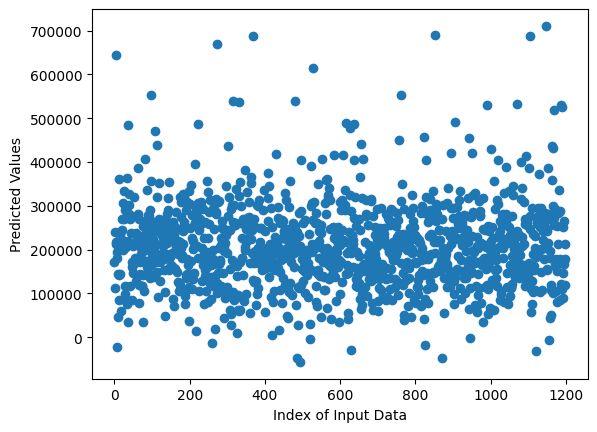

In [5]:
X = train_data
y = train_labels

# Solve the normal equations (X^T X) theta = X^T y
theta_hat = np.linalg.solve(X.T@X, X.T@y)

y_hat = theta_hat@test_data.T

range_prediction = np.ptp(y_hat)
maxi = np.max(y_hat)
mini = np.min(y_hat)
print("The range of the predicted values is ", range_prediction, " in the interval (", mini, ", ", maxi, ")")
print("The mean home value predicted is : ", np.mean(y_hat))

plt.plot(y_hat,'o')
plt.ylabel("Predicted Values")
plt.xlabel("Index of Input Data")

From the plot it is visible that the model predicts some of the home values to be negative which is impractical. This shows that using a linear regression model for a high dimensional input gives misleading predictions. Also, a linear regression model highly susceptible to outliers. 

However, we can infer from the prediction that the average home value is around 209279 which makes practical sense.

Text(0, 0.5, 'Parameter values')

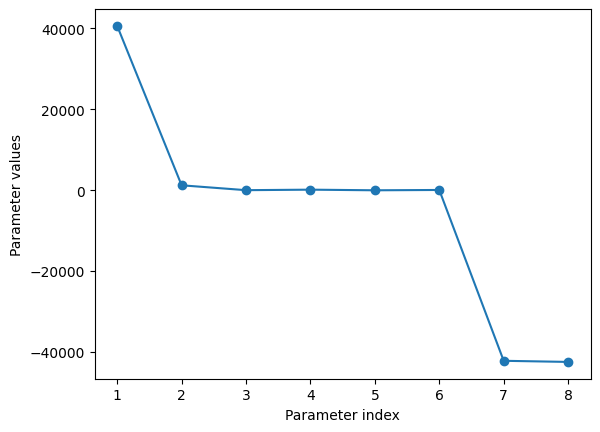

In [6]:
index = np.linspace(1,theta_hat.shape[0]-1,theta_hat.shape[0]-1)
plt.plot(index,theta_hat[1:],'-o')
plt.xlabel("Parameter index")
plt.ylabel("Parameter values")

Text(0.5, 1.0, 'Histogram of Residual Values')

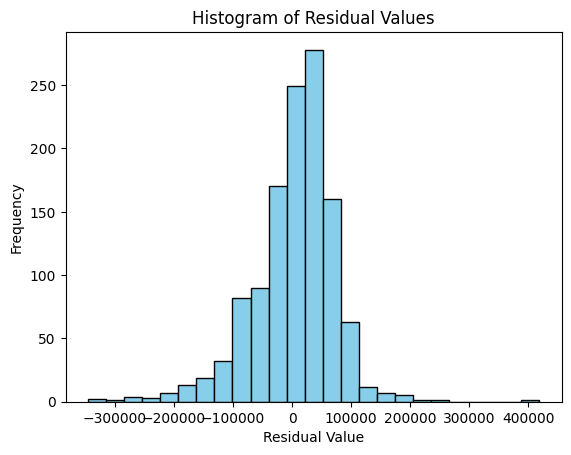

In [9]:
Residual = y_hat - test_labels

plt.hist(Residual, bins=25, color='skyblue', edgecolor='black')
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.title("Histogram of Residual Values")

The distribution of the Residual values resembles that of a Gaussian distribution.